## 以简单线性回归作为例子
- 均方误差
    - 量纲不一致，误差的单位是平方
![](均方误差.png)
<br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br>
- 均方根误差
![](均方根误差.png)
<br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br>
- 平均绝对误差
![](平均绝对误差.png)

## 编程实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [3]:
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
x = boston.data[:,5]  # 只使用房间数量这个特征
x.shape

(506,)

In [15]:
y = boston.target
y.shape

(506,)

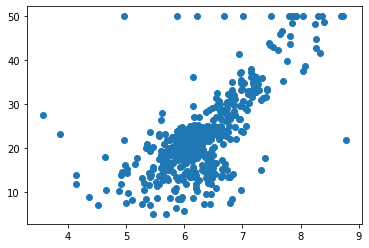

In [16]:
plt.scatter(x,y)
plt.show()

In [17]:
np.max(y)

50.0

In [18]:
x = x[y < 50]
y = y[y < 50]

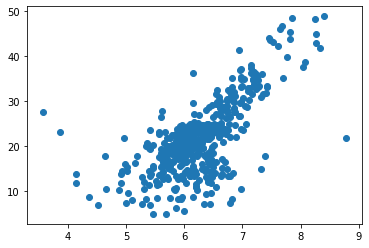

In [19]:
plt.scatter(x,y)
plt.show()

### 使用简单线性回归算法

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666)

In [20]:
from Machine_Learning.LinearReg.SimpleLinearRegression import SimpleLinearRegression2

In [24]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

In [25]:
reg.a_

7.833972917686114

In [26]:
reg.b_

-27.252755266879902

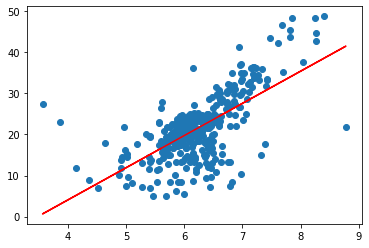

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.a_*x_train+reg.b_,color="r")
plt.show()

In [28]:
y_predict = reg.predict(x_test)

### MSE:均方误差（Mean squared error）
![](均方误差.png)

In [30]:
mse_test = (y_test - y_predict).dot(y_test - y_predict) / len(y_test)
mse_test

28.215949368640807

In [31]:
mse_test = np.sum((y_test - y_predict)**2) / len(y_test)
mse_test

28.215949368640796

### RMSE
![](均方根误差.png)

In [33]:
rmse_test = np.sqrt(mse_test)
rmse_test

5.311868726600912

### MAE
![](平均绝对误差.png)

In [35]:
mae_test = np.sum(np.abs(y_test - y_predict)) / len(y_test)
mae_test

3.9489046062737843

### 作业：实现代码并调用

### sklearn中的MES和MAE

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
mean_squared_error(y_test,y_predict)

28.215949368640796

In [37]:
mean_absolute_error(y_test,y_predict)

3.9489046062737843

### RMSE 与MAE的比较
- RMSE因为有平方，所以它放大了其中差距很大的数值